<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [4]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак - мінімум 2 ящика та гістограм
* аналіз категоріальних ознак - мінімум 1 груповий ящик
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

Зверніть увагу, що стовпчик `pclass` є по суті категоріальним, тому перед початком роботи змініть його тип даних на `object`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [6]:
df.pclass = df.pclass.astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    object 
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [19]:
df.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


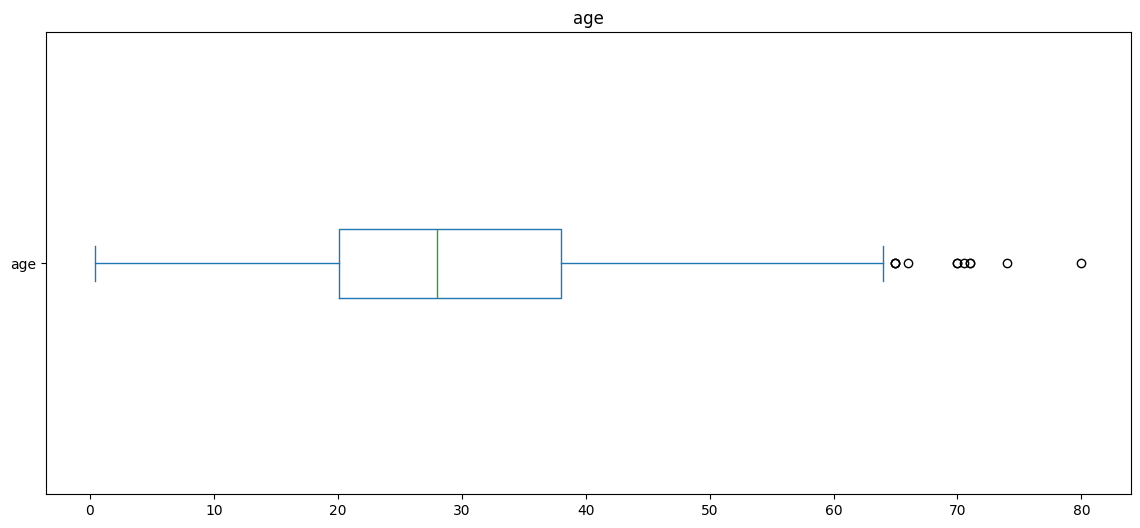

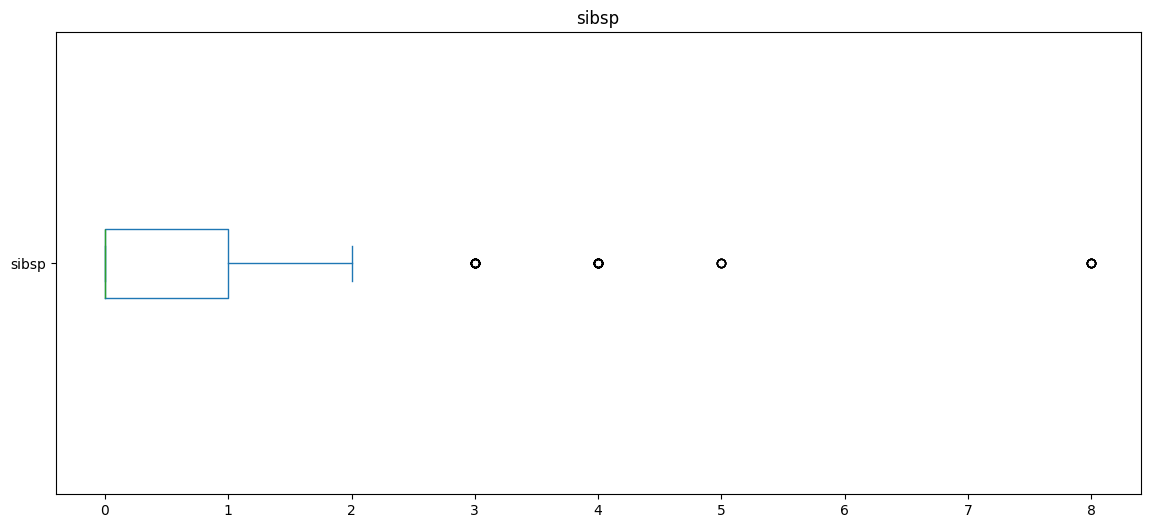

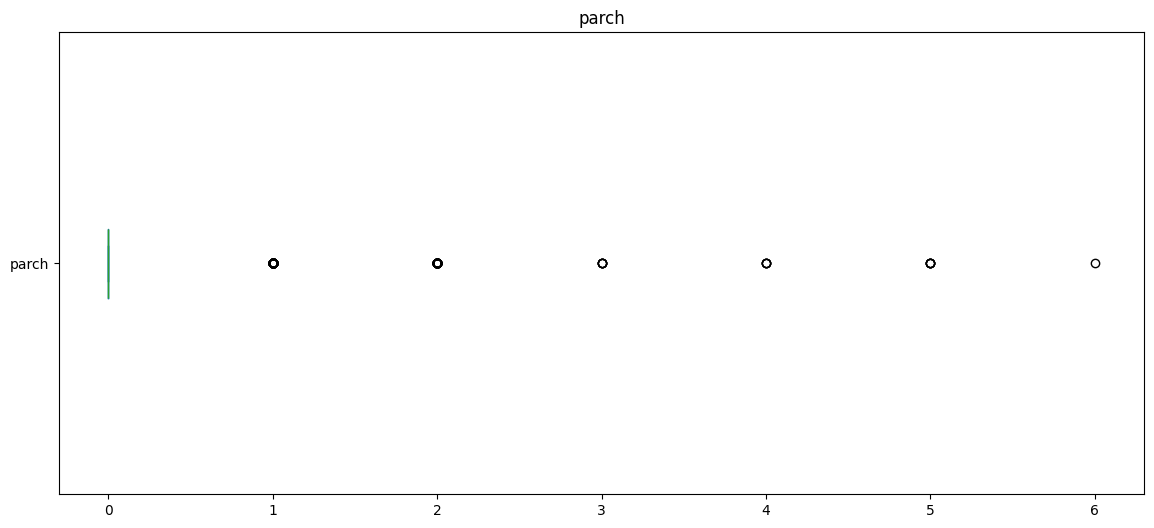

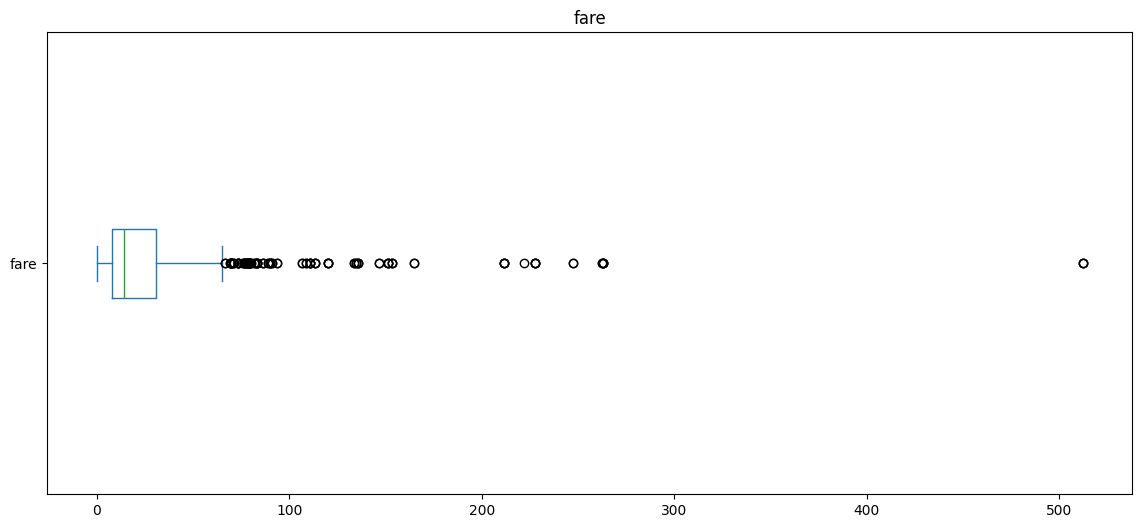

In [10]:
for col in df.select_dtypes(include="number").columns:
  df[col].plot(kind="box", vert=False , figsize=(14,6))
  plt.title(col)
  plt.show()
  #print(col, df[col].dtype)

In [12]:
df_clear = df[df.fare<300]
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    888 non-null    object 
 1   sex       888 non-null    object 
 2   age       711 non-null    float64
 3   sibsp     888 non-null    int64  
 4   parch     888 non-null    int64  
 5   fare      888 non-null    float64
 6   embarked  886 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.5+ KB


In [20]:
df_clear.describe()

,age,sibsp,parch,fare
count,711.000000,888.000000,888.000000,888.000000
mean,29.675345,0.524775,0.381757,30.582164
std,14.552495,1.104186,0.806949,41.176366
min,0.420000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,30.771850
max,80.000000,8.000000,6.000000,263.000000


Видалено лише 3 записа з 891, з викидом по ціні квиточка <br>
Побудуємо ящики з вусами і гістограми на очищенних данних:

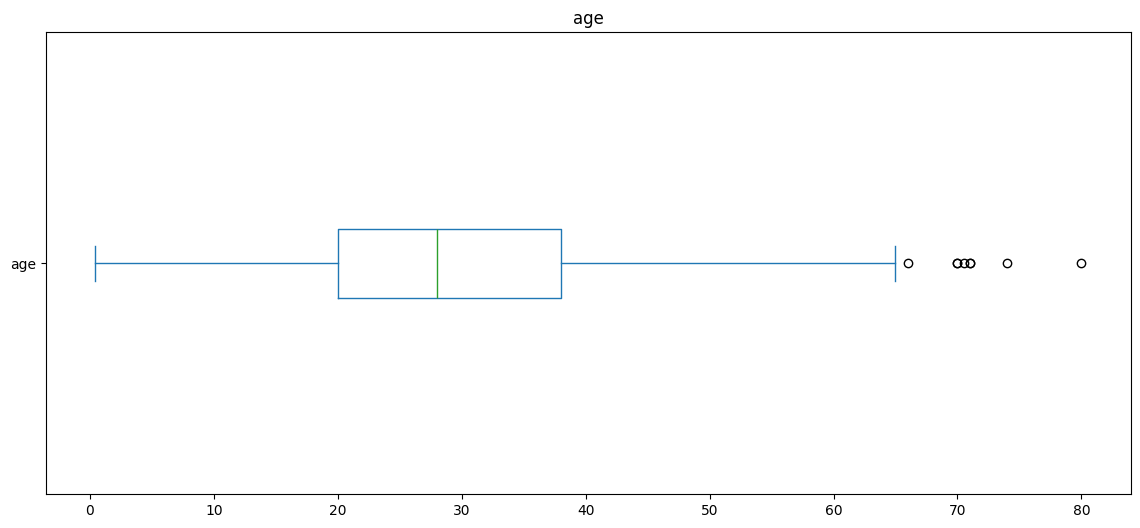

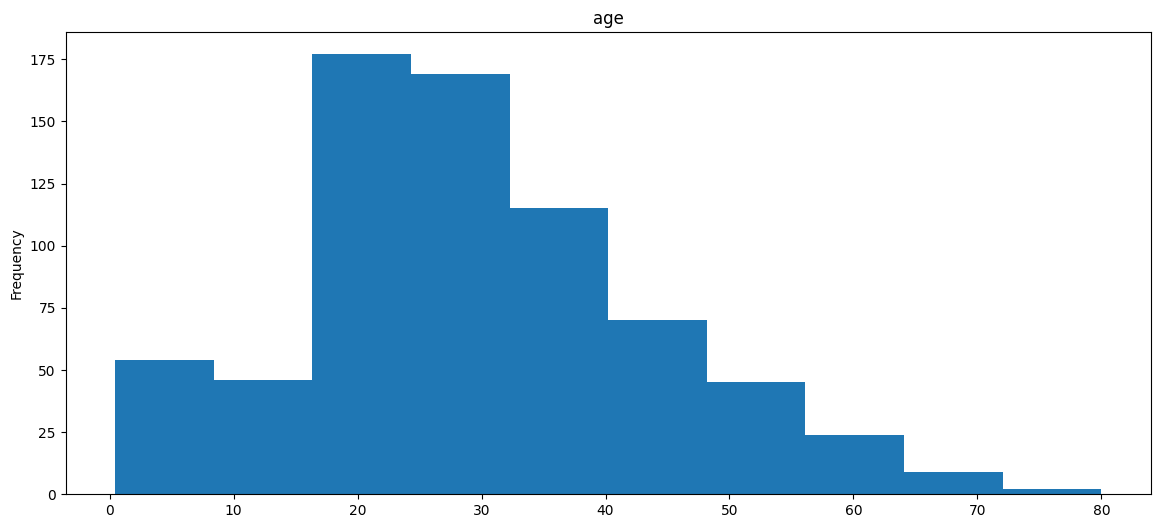

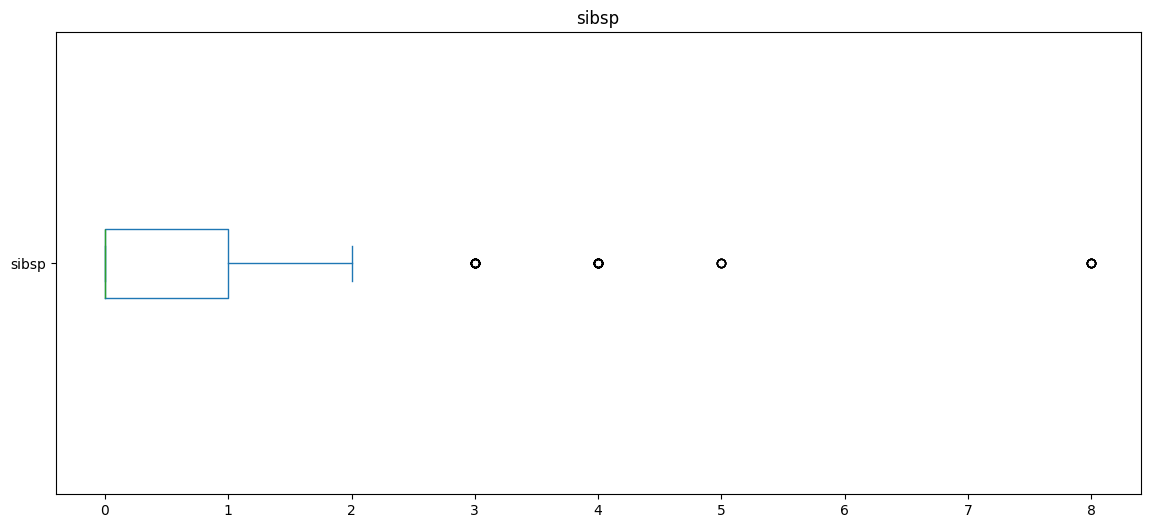

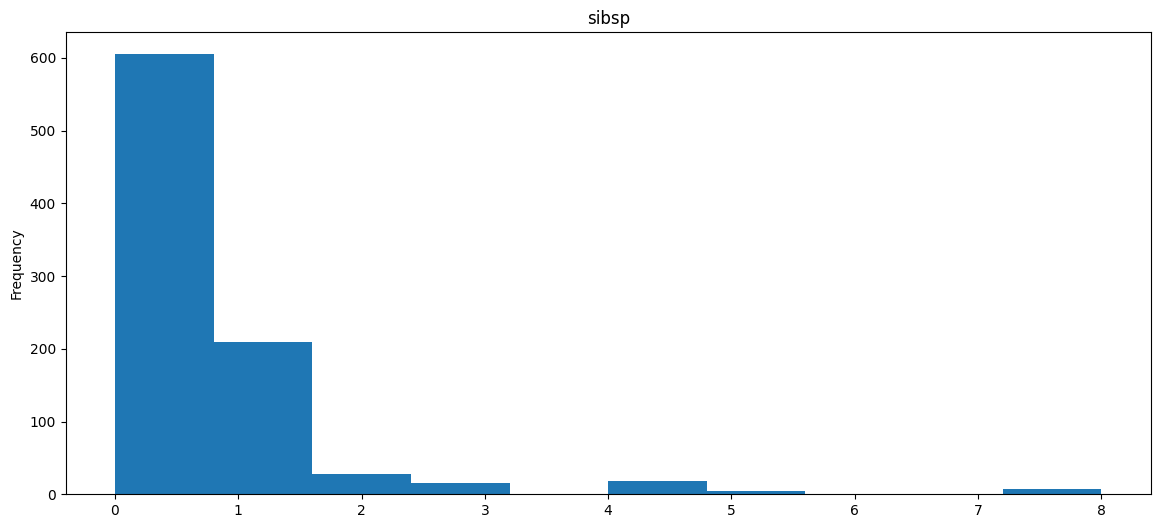

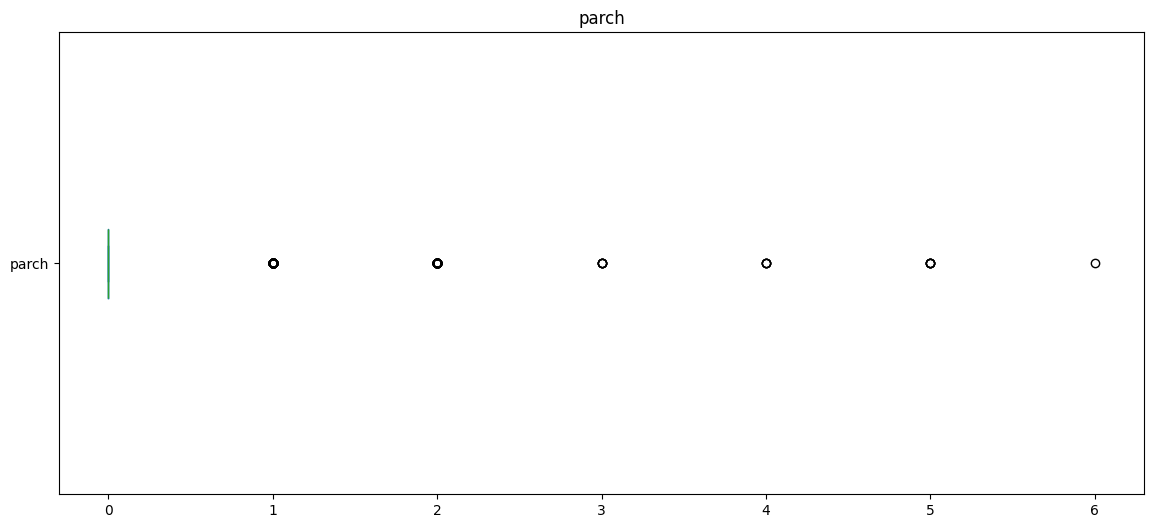

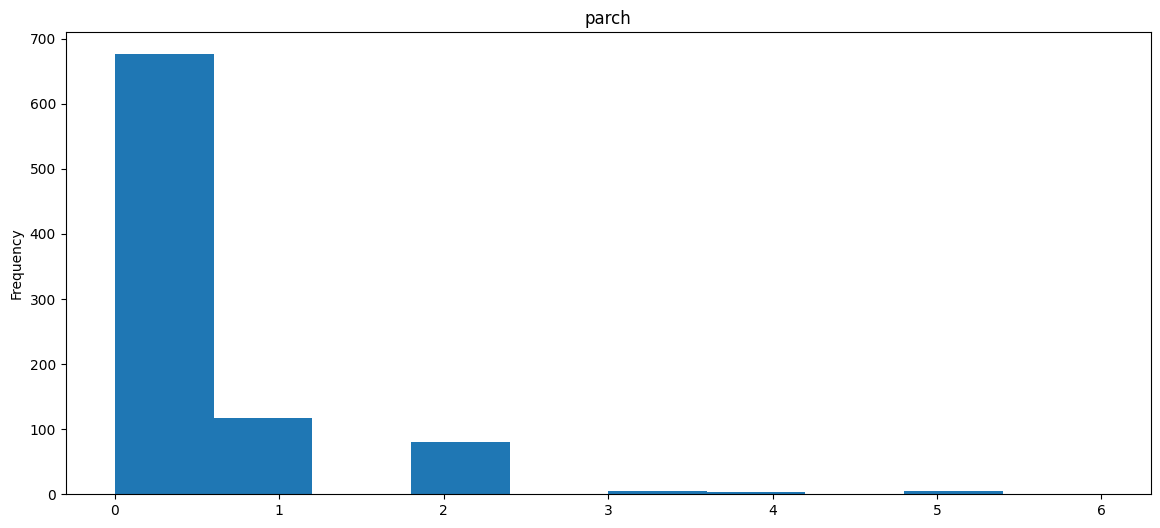

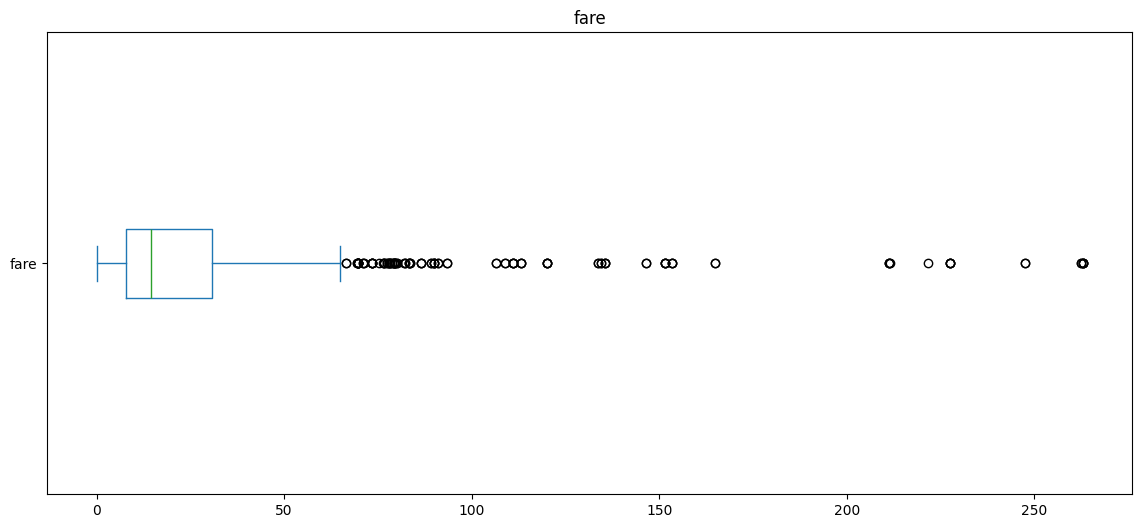

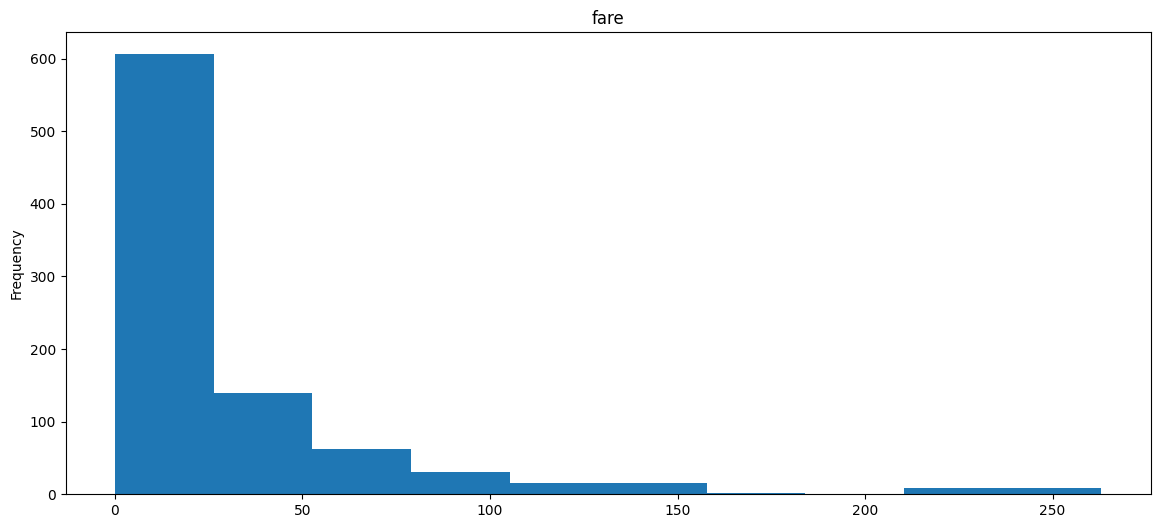

In [17]:
for col in df_clear.select_dtypes(include="number"):
  df_clear[col].plot(kind='box', vert=False, figsize=(14, 6))
  plt.title(col)
  plt.show()
  df_clear[col].plot(kind="hist", figsize=(14, 6))
  plt.title(col)
  plt.show()

In [22]:
(df.fare>200).sum()

20

In [23]:
(df.fare>100).sum()

53

Змінна fare все ще має викиди, оскільки цих значень порядка 6%, то можна почистити й їх, проте, ящик з вусами по цій змінній видно досить добре, вирішила не чистити

<Axes: title={'center': 'fare'}, xlabel='pclass'>

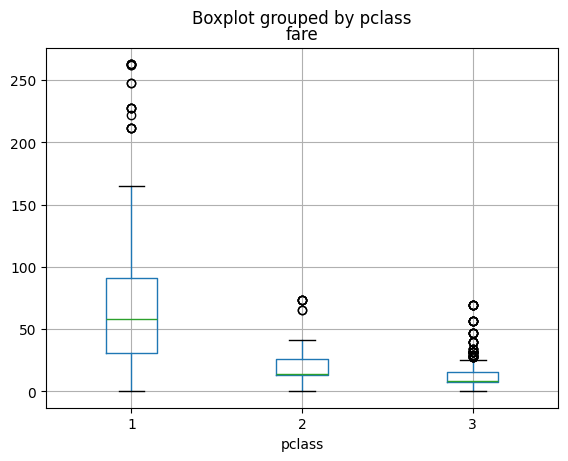

In [26]:
df_clear.boxplot(by="pclass", column="fare")

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

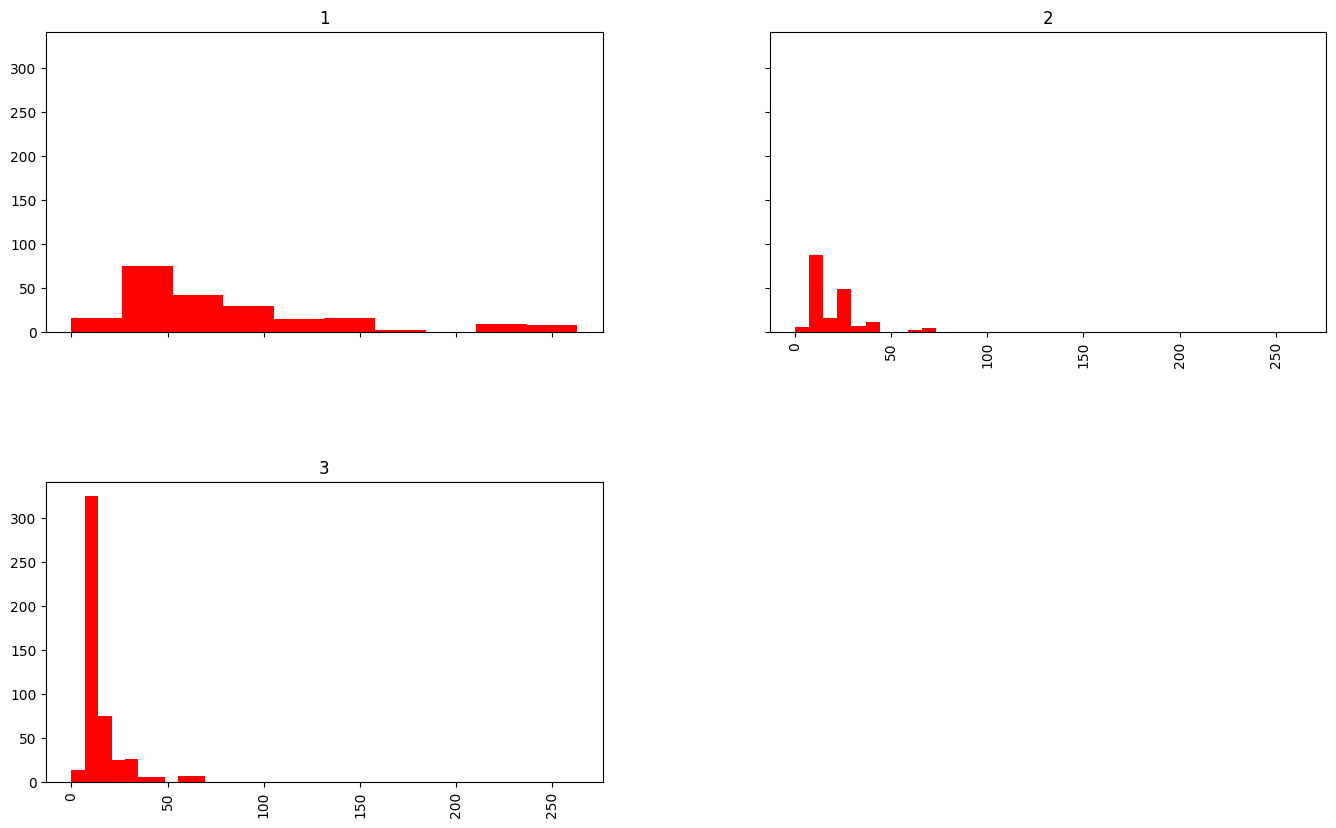

In [32]:
df_clear.hist(by="pclass", column="fare", figsize=(16,10), sharey=True, sharex=True, color='red')


In [33]:
corr = df_clear.select_dtypes(include='number').corr(method='pearson')

corr

,age,sibsp,parch,fare
age,1.000000,-0.307639,-0.189194,0.100396
sibsp,-0.307639,1.000000,0.415141,0.211816
parch,-0.189194,0.415141,1.000000,0.263910
fare,0.100396,0.211816,0.263910,1.000000


Ми маємо не дуже сильно виражену заледність між sibsp та parch

<Axes: xlabel='sibsp', ylabel='parch'>

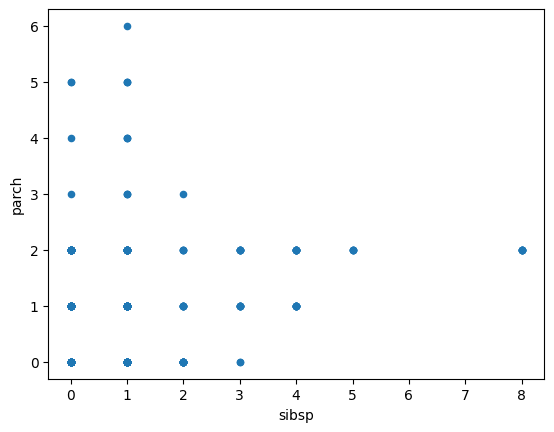

In [35]:
df_clear.plot(kind="scatter", x="sibsp", y="parch")

Графік показує що вона ну дуже слабенька, думаю, лінійна регресія видала б лінію типу y=x, але помилка буде досить велика <br>
Взагалі, графік не дуже інформативий для цілих значень х та y. Адже я не бачу частот, точка це 10 таких значень чи одне

In [39]:
df.pclass = df.pclass.astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [42]:
corr = df_clear.select_dtypes(include="number").corr(method="pearson")
corr

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.368625,0.080937,0.018212,-0.604960
age,-0.368625,1.000000,-0.307639,-0.189194,0.100396
sibsp,0.080937,-0.307639,1.000000,0.415141,0.211816
parch,0.018212,-0.189194,0.415141,1.000000,0.263910
fare,-0.604960,0.100396,0.211816,0.263910,1.000000


Між класом білета і його ціною ми бачимо обернену залежність <br>


Клас білета впливає на його ціну